## Linear Regression and typical workflow during the model development process:

1. Data Preparation
2. Model Selection
3. Splitting the Data
4. Model Training and Evaluation
5. Cross-Validation
6. Hyperparameter Tuning
7. Final Model Evaluation


In [36]:
from IPython.display import display, Markdown

from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing


In [37]:
# help(preprocessing)

Help on package sklearn.preprocessing in sklearn:

NAME
    sklearn.preprocessing

DESCRIPTION
    The :mod:`sklearn.preprocessing` module includes scaling, centering,
    normalization, binarization methods.

PACKAGE CONTENTS
    _csr_polynomial_expansion
    _data
    _discretization
    _encoders
    _function_transformer
    _label
    _polynomial
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.preprocessing._data.Binarizer(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.KernelCenterer(sklearn.base.ClassNamePrefixFeaturesOutMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.MaxAbsScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
        sklearn.preprocessing._data.MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.Ba

In [2]:
# Load california housing dataset
!pwd
data = fetch_california_housing(data_home="data/")
# Display the dataset description
display(Markdown(data.DESCR))

/home/edgar/ds-ai-bootcamp/supervised-learning


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297


In [3]:
# get data in dataframe format
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# distribution of the data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
# Separate the features and target variable
X = data.data
y = data.target

### Cross-validation

In [14]:
# Create a linear regression model
model = LinearRegression(fit_intercept=True)

# Perform cross-validation
scores = cross_val_score(
    model, X, y, cv=5
)

# [1, 2, 3, 4, 5]
# [1, 2, 3, 4] + [5]
# [1, 2, 3, 5] + [4]
# [1, 2, 4, 5] + [3]
# [1, 3, 4, 5] + [2]
# [2, 3, 4, 5] + [1]

display("Cross-Validation Scores:", scores)

mean_score = scores.mean()
display("Average Score:", mean_score)

'Cross-Validation Scores:'

array([0.54328697, 0.44540838, 0.5234154 , 0.39855735, 0.52790006])

'Average Score:'

0.48771363062898265

In [13]:
# help(cross_val_score)

### Training a model

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)

print("Model Score:", score)

coefficients = model.coef_
intercept = model.intercept_
display("Coefficients:", coefficients)
display("Intercept:", intercept)

Model Score: 0.5997834992600828


'Coefficients:'

array([ 4.26085495e-01,  9.60027706e-03, -9.39474636e-02,  5.76630257e-01,
       -3.21699362e-06, -3.28870850e-03, -4.22629123e-01, -4.36237698e-01])

'Intercept:'

-37.066129059310505

<AxesSubplot:>

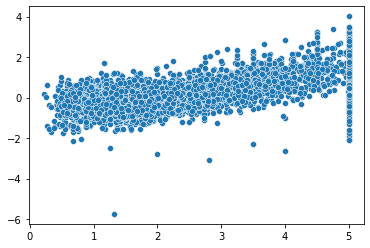

In [17]:
# inspect model residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)

In [18]:
# diagnosis of model residuals
from scipy.stats import shapiro
from scipy.stats import normaltest

# Shapiro-Wilk Test
_, p = shapiro(residuals)

print(f'Shapiro-Wilk Test: {p:.3f}')

if p > 0.05:

    print('Residuals look Gaussian (fail to reject H0)')

else:

    print('Residuals do not look Gaussian (reject H0)')

# D’Agostino’s K^2 Test
_, p = normaltest(residuals)

print(f'D’Agostino’s K^2 Test: {p:.3f}')

if p > 0.05:

    print('Residuals look Gaussian (fail to reject H0)')

else:

    print('Residuals do not look Gaussian (reject H0)')


Shapiro-Wilk Test: 0.000
Residuals do not look Gaussian (reject H0)
D’Agostino’s K^2 Test: 0.000
Residuals do not look Gaussian (reject H0)


/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Hyperparameter tuning

In [19]:
# Create a LinearRegression model
model = LinearRegression()

# Define the hyperparameters and their possible values
param_grid = {
    'fit_intercept': [True, False],
}

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'fit_intercept': True}
Best Score: 0.5530311140279238


In [22]:
grid_search.cv_results_['mean_test_score']

array([0.55303111, 0.48771363])

In [26]:
# help(f_regression)

In [27]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)
print(X_selected.shape)
# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()].tolist()

# Train a linear regression model with the selected features
model = LinearRegression()
model.fit(X_selected, y)

# Print the selected feature names
print("Selected Features:", selected_feature_names)

# Print the coefficients of the linear regression model
print("Coefficients:", model.coef_)


(20640, 3)
Selected Features: ['MedInc', 'AveRooms', 'Latitude']
Coefficients: [ 0.42788861 -0.0325405  -0.0434988 ]


In [31]:
help(f_regression)

Help on function f_regression in module sklearn.feature_selection._univariate_selection:

f_regression(X, y, *, center=True, force_finite=True)
    Univariate linear regression tests returning F-statistic and p-values.
    
    Quick linear model for testing the effect of a single regressor,
    sequentially for many regressors.
    
    This is done in 2 steps:
    
    1. The cross correlation between each regressor and the target is computed
       using :func:`r_regression` as::
    
           E[(X[:, i] - mean(X[:, i])) * (y - mean(y))] / (std(X[:, i]) * std(y))
    
    2. It is converted to an F score and then to a p-value.
    
    :func:`f_regression` is derived from :func:`r_regression` and will rank
    features in the same order if all the features are positively correlated
    with the target.
    
    Note however that contrary to :func:`f_regression`, :func:`r_regression`
    values lie in [-1, 1] and can thus be negative. :func:`f_regression` is
    therefore recommend

In [30]:
# List of values for k
k_values = [1, 2, 3, 4, 5, 6, 7, 8]

# Iterate over different values of k
for k in k_values:
    # Perform feature selection using SelectKBest
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    selected_feature_names = X.columns[selector.get_support()].tolist()
    print(f"k={k} - Selected Features:", selected_feature_names)

    # Train a linear regression model with the selected features
    model = LinearRegression()
    scores = cross_val_score(model, X_selected, y, cv=5)

    # Print the average score for the current value of k
    print(f"Average Score (k={k}):", scores.mean())

k=1 - Selected Features: ['MedInc']
Average Score (k=1): 0.42139707826944833
k=2 - Selected Features: ['MedInc', 'AveRooms']
Average Score (k=2): 0.42207514605561613
k=3 - Selected Features: ['MedInc', 'AveRooms', 'Latitude']
Average Score (k=3): 0.4178288726487363
k=4 - Selected Features: ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']
Average Score (k=4): 0.4564269017875916
k=5 - Selected Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude']
Average Score (k=5): 0.48739925917614446
k=6 - Selected Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']
Average Score (k=6): 0.554960787917117
k=7 - Selected Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude']
Average Score (k=7): 0.5540782576426528
k=8 - Selected Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Average Score (k=8): 0.5530311140279238


In [32]:
# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled testing data
score = model.score(X_test_scaled, y_test)
print("R-squared score:", score)


R-squared score: 0.5957702326061662


In [34]:
# help(MinMaxScaler)

In [35]:
# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize the standard scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled testing data
score = model.score(X_test_scaled, y_test)
print("R-squared score:", score)


R-squared score: 0.5957702326061665


In [ ]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_feature_names = X.columns[selector.get_support()].tolist()

# Train a linear regression model with the selected features
model = LinearRegression()
model.fit(X_selected, y)

# Print the selected feature names
print("Selected Features:", selected_feature_names)

# Print the coefficients of the linear regression model
print("Coefficients:", model.coef_)


In [ ]:
# List of values for k
k_values = [1, 2, 3, 4, 5, 6, 7, 8]

# Iterate over different values of k
for k in k_values:
    # Perform feature selection using SelectKBest
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit the scaler to the training data and transform the features
    X_selected_scaled = scaler.fit_transform(X_selected)

    # Train a linear regression model with the selected features
    model = LinearRegression()
    scores = cross_val_score(model, X_selected_scaled, y, cv=5)

    # Print the average score for the current value of k
    print(f"Average Score (k={k}):", scores.mean())